In [100]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [101]:
#https://zhuanlan.zhihu.com/p/37656309

In [102]:
train=train[['SalePrice', 'OverallQual','YearBuilt','YearRemodAdd', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'FullBath']]
train.dropna()
print(train.shape)
#max_min_scaler=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
#train['SalePrice']=train[['SalePrice']].apply(max_min_scaler)
train.head()

(1460, 9)


,SalePrice,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath
0,208500,7,2003,2003,1710,2,856,856,2
1,181500,6,1976,1976,1262,2,1262,1262,2
2,223500,7,2001,2002,1786,2,920,920,2
3,140000,7,1915,1970,1717,3,756,961,1
4,250000,8,2000,2000,2198,3,1145,1145,2


In [103]:
y_train=train["SalePrice"]
del train["SalePrice"]
x_train=train

In [104]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
#https://zhuanlan.zhihu.com/p/486448453

In [106]:
n_folds = 5

def var_name(var,all_var=locals()):
    return [var_name for var_name in all_var if all_var[var_name] is var][0]

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    print("\n{} score: {:.4f} ({:.4f})\n".format(var_name(model),rmse.mean(), rmse.std()))

In [107]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
rmsle_cv(lasso)


lasso score: 38392.2709 (6072.3796)



In [108]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
rmsle_cv(ENet)


ENet score: 38391.9953 (6071.9423)



In [109]:
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
#rmsle_cv(KRR)

In [110]:
print(x_train)
print(x_test)

      OverallQual  YearBuilt  YearRemodAdd  GrLivArea  GarageCars  \
0               7       2003          2003       1710           2   
1               6       1976          1976       1262           2   
2               7       2001          2002       1786           2   
3               7       1915          1970       1717           3   
4               8       2000          2000       2198           3   
...           ...        ...           ...        ...         ...   
1455            6       1999          2000       1647           2   
1456            6       1978          1988       2073           2   
1457            7       1941          2006       2340           1   
1458            5       1950          1996       1078           1   
1459            5       1965          1965       1256           1   

      TotalBsmtSF  1stFlrSF  FullBath  
0             856       856         2  
1            1262      1262         2  
2             920       920         2  
3          

In [111]:
from pyearth import Earth

model = Earth()
model.fit(x_train,y_train)


D:\anaconda\envs\ML\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Earth()

In [124]:
x_test=test[[ 'OverallQual','YearBuilt','YearRemodAdd', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'FullBath']]
#max_min_scaler=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))
y_test=pd.read_csv("sample_submission.csv")
del y_test['Id']
y_test['SalePrice']=y_test[['SalePrice']].apply(max_min_scaler)
TEST=pd.concat([x_test,y_test],axis=1)
TEST.replace("Nan",np.nan,inplace=True)
TEST.dropna(axis=1,how='any')
y_test=TEST["SalePrice"]
del TEST["SalePrice"]
x_test=TEST
#x_test=x_train
#y_test=y_train

In [125]:
TEST.shape

(1459, 8)

In [116]:
from sklearn import metrics
y_hat = model.predict(x_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_hat)))

ValueError: Input contains NaN, infinity or a value that's too large.Did you mean to set allow_missing=True?

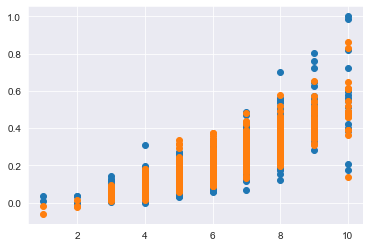

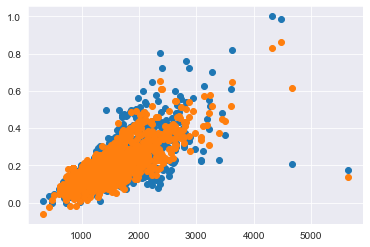

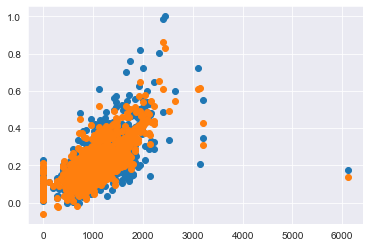

In [110]:
plt.scatter(x_train["OverallQual"],y_train)
plt.scatter(x_train["OverallQual"],y_hat)
plt.show()
plt.scatter(x_train["GrLivArea"],y_train)
plt.scatter(x_train["GrLivArea"],y_hat)
plt.show()

plt.scatter(x_train["TotalBsmtSF"],y_train)
plt.scatter(x_train["TotalBsmtSF"],y_hat)
plt.show()

In [50]:
from sklearn import linear_model
from sklearn.linear_model import Lasso###导入岭回归算法
from sklearn.metrics import r2_score
clf=linear_model.LassoCV()
x_test=x_test.dropna()
clf.fit(x_train,y_train)
y_hat=clf.predict(x_test)

D:\anaconda\envs\ML\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SalePrice
Feature names seen at fit time, yet now missing:
- 1stFlrSF
- FullBath
- GarageCars
- GrLivArea
- OverallQual
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but LassoCV is expecting 8 features as input.